In [1]:
import numpy as np
import matplotlib.pyplot as plt
from train import get_parser
from ssd.config.defaults import cfg
from ssd.data.build import make_data_loader
from vizer.draw import draw_boxes
np.random.seed(0)

In [2]:
config_path = "configs/train_waymo_Copy1.yaml"
cfg.merge_from_file(config_path)
cfg.freeze()

In [3]:
data_loader = make_data_loader(cfg, is_train=True)
if isinstance(data_loader, list):
    print(list)
    data_loader = data_loader[0]
dataset = data_loader.dataset
indices = list(range(len(dataset)))
#np.random.shuffle(indices)

17936
Dataset loaded. Subset: train, number of images: 14348


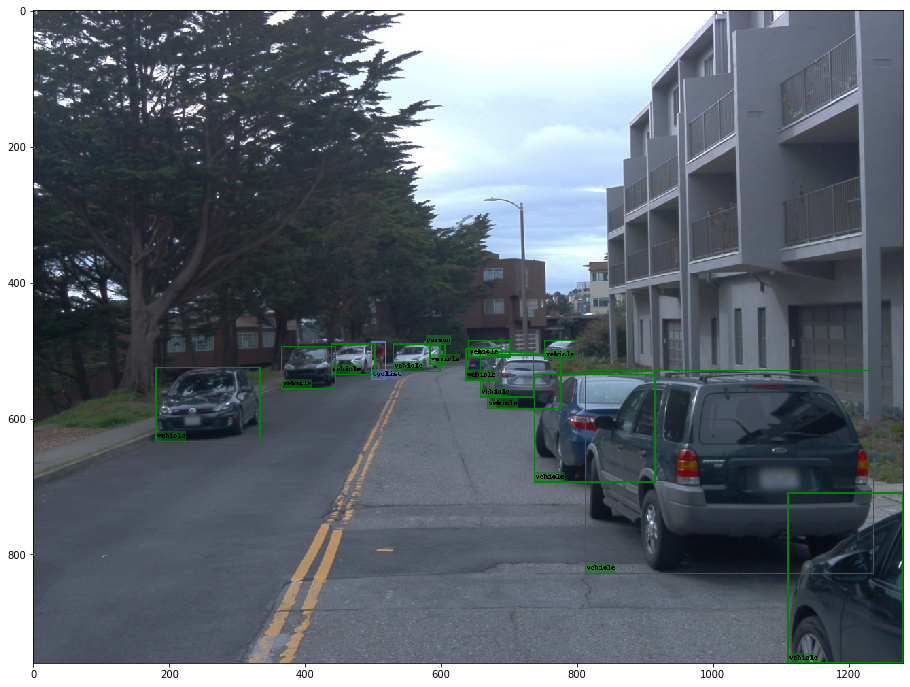

In [191]:
idx = indices[1]
image = dataset._read_image(idx)
boxes, labels = dataset.get_annotation(idx)
image = draw_boxes(
    image, boxes, labels, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image)
#plt.imsave("visualization.png", image)
#print("Saved the image to visualization.png")

In [199]:
boxes

array([[ 576.61536,  486.0085 ,  583.28876,  493.5876 ],
       [ 657.8879 ,  502.11404,  736.5387 ,  569.37836],
       [ 636.4376 ,  497.1403 ,  689.3482 ,  544.9832 ],
       [ 497.01117,  487.19275,  519.8914 ,  543.56213],
       [ 668.1363 ,  506.85098,  777.7708 ,  586.43134],
       [1110.2493 ,  709.3545 , 1280.     ,  960.     ],
       [ 737.0154 ,  535.7462 ,  915.7673 ,  694.9069 ],
       [ 438.1422 ,  490.74542,  503.44623,  536.2199 ],
       [ 180.7395 ,  525.325  ,  334.70447,  634.27423],
       [ 583.5271 ,  491.6928 ,  606.884  ,  521.06177],
       [ 365.44977,  494.06128,  445.53064,  557.5361 ],
       [ 640.0127 ,  485.53482,  702.93335,  510.1668 ],
       [ 812.32947,  529.5882 , 1237.044  ,  828.01447],
       [ 752.74554,  485.53482,  801.8427 ,  514.90375],
       [ 529.1865 ,  490.27173,  599.25726,  531.95667]], dtype=float32)

In [ ]:
#The codes above is designed by the TA of tdt4265
#The flowing part is designed by Xiaoyu to understand the data augmentations

In [4]:
from ssd.data.transforms.transforms import *

1


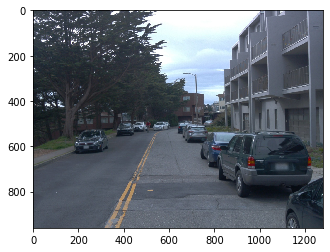

In [9]:
idx = indices[1]
image = dataset._read_image(idx)
plt.imshow(image)
print(idx)

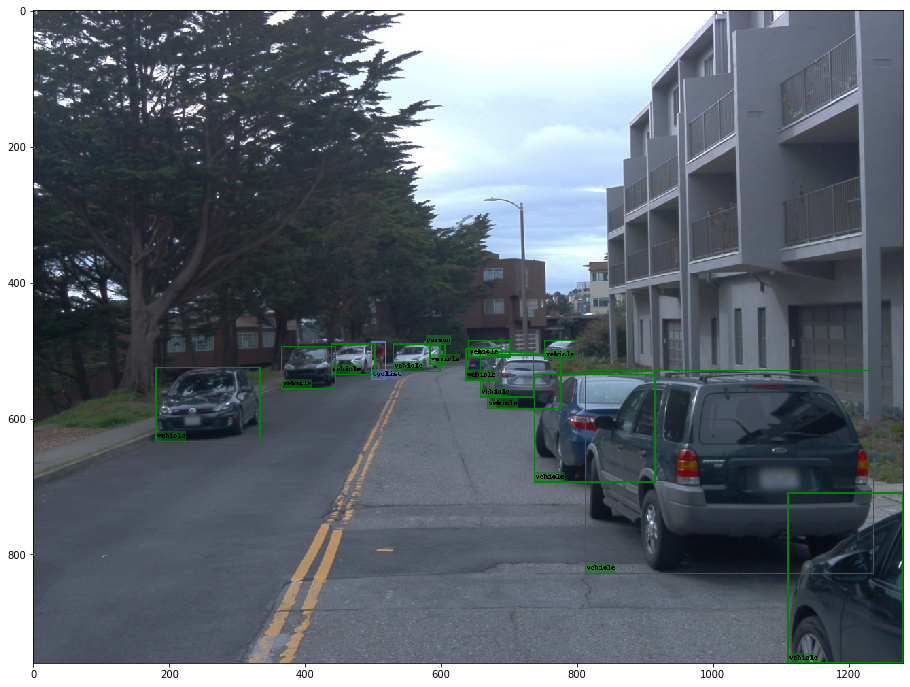

In [12]:
boxes, labels = dataset.get_annotation(idx)
image1 = draw_boxes(
    image, boxes, labels, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image1)

In [66]:
#ConverfromInt
image.shape

(960, 1280, 3)

In [151]:
#Dive into the data loading
import pathlib
from PIL import Image
import json

def _read_image(index):
    data_dir = "datasets/waymo"
    data_dir =pathlib.Path(data_dir)
    image_id = index
    image_path = data_dir.joinpath("images").joinpath(f"{image_id}.jpg")
    image = Image.open(str(image_path)).convert("RGB")
    image = np.array(image)
    return image
def _get_annotation(image_id,labels):
    label = labels[image_id]
    bbox_key = "bounding_boxes"
    if bbox_key not in label:
        bbox_key = "bboxes"
    boxes = np.zeros((len(label[bbox_key]), 4), dtype=np.float32)
    labels = np.zeros((len(label[bbox_key])), dtype=np.int64)
    for idx, bounding_box in enumerate(label[bbox_key]):
        box = [
            bounding_box["xmin"],
            bounding_box["ymin"],
            bounding_box["xmax"],
            bounding_box["ymax"]]
        boxes[idx] = box
        labels[idx] = bounding_box["label_id"]
    # SSD use label 0 as the background. Therefore +1
    labels = labels + 1
    return boxes, labels
def read_labels(label_path):
    assert label_path.is_file(), \
        f"Did not find label file: {label_path.absolute()}"
    with open(label_path, "r") as fp:
        labels = json.load(fp)
    labels_processed = {}
    for label in labels:
        image_id = label["image_id"]
        labels_processed[image_id] = label
    return labels_processed

In [262]:
#get the image '1.jpg' and relating box and label
print(idx)
image_test=_read_image(idx)
data_dir = "datasets/waymo"
data_dir =pathlib.Path(data_dir)
label_total=read_labels(data_dir.joinpath("labels.json"))
label_test=_get_annotation(idx,label_total)
box_test=label_test[0] 
label_test = label_test[1]


1


In [263]:
print('image_test',image_test)
print('label_test',label_test)
print('box_test',box_test)

image_test [[[122 125 158]
  [201 205 232]
  [217 222 241]
  ...
  [104 111 130]
  [105 110 130]
  [103 108 128]]

 [[ 81  84 117]
  [118 122 149]
  [185 190 209]
  ...
  [104 111 130]
  [103 108 128]
  [102 107 127]]

 [[ 70  73 108]
  [ 75  79 108]
  [ 81  86 105]
  ...
  [103 109 131]
  [102 107 129]
  [101 106 128]]

 ...

 [[ 79  87 100]
  [ 79  87 100]
  [ 78  86  99]
  ...
  [ 44  54  66]
  [ 44  52  65]
  [ 43  51  64]]

 [[ 80  88 101]
  [ 80  88 101]
  [ 79  87 100]
  ...
  [ 45  54  69]
  [ 44  53  68]
  [ 43  52  67]]

 [[ 79  87 100]
  [ 79  87 100]
  [ 78  86  99]
  ...
  [ 44  53  68]
  [ 43  52  67]
  [ 42  51  66]]]
label_test [2 1 1 4 1 1 1 1 1 1 1 1 1 1 1]
box_test [[ 576.61536  486.0085   583.28876  493.5876 ]
 [ 657.8879   502.11404  736.5387   569.37836]
 [ 636.4376   497.1403   689.3482   544.9832 ]
 [ 497.01117  487.19275  519.8914   543.56213]
 [ 668.1363   506.85098  777.7708   586.43134]
 [1110.2493   709.3545  1280.       960.     ]
 [ 737.0154   535.7462   

image_origianl_shape (960, 1280, 3)


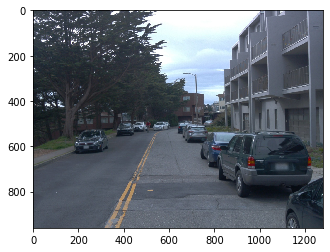

In [264]:
#Show the original version of the '1.jpg'
plt.imshow(image_test)
print('image_origianl_shape',image_test.shape)

In [77]:
#Dive into different Data transforms

In [244]:
#This is the origianl version in tdt4265's code
t1=ConvertFromInts()
t2=ToPercentCoords()
t3=Resize(300)
t4=SubtractMeans([123, 117, 104])
t_absolute_coor=ToAbsoluteCoords()

In [267]:
#This is the data augmentation used in lufficc code
t1=ConvertFromInts()
t2=PhotometricDistort()
t3=Expand(cfg.INPUT.PIXEL_MEAN)
t4=RandomSampleCrop()
t5=RandomMirror()
t6=ToPercentCoords()
t7=Resize(cfg.INPUT.IMAGE_SIZE)
t8=SubtractMeans(cfg.INPUT.PIXEL_MEAN)

In [268]:
#t1 is ConvertFromInts, which is to convert the original type'int' into 'float'
img,box,label=t1(image_test,box_test,label_test)

In [269]:
print('img',img)
print('box',box)
print('label',label)

img [[[122. 125. 158.]
  [201. 205. 232.]
  [217. 222. 241.]
  ...
  [104. 111. 130.]
  [105. 110. 130.]
  [103. 108. 128.]]

 [[ 81.  84. 117.]
  [118. 122. 149.]
  [185. 190. 209.]
  ...
  [104. 111. 130.]
  [103. 108. 128.]
  [102. 107. 127.]]

 [[ 70.  73. 108.]
  [ 75.  79. 108.]
  [ 81.  86. 105.]
  ...
  [103. 109. 131.]
  [102. 107. 129.]
  [101. 106. 128.]]

 ...

 [[ 79.  87. 100.]
  [ 79.  87. 100.]
  [ 78.  86.  99.]
  ...
  [ 44.  54.  66.]
  [ 44.  52.  65.]
  [ 43.  51.  64.]]

 [[ 80.  88. 101.]
  [ 80.  88. 101.]
  [ 79.  87. 100.]
  ...
  [ 45.  54.  69.]
  [ 44.  53.  68.]
  [ 43.  52.  67.]]

 [[ 79.  87. 100.]
  [ 79.  87. 100.]
  [ 78.  86.  99.]
  ...
  [ 44.  53.  68.]
  [ 43.  52.  67.]
  [ 42.  51.  66.]]]
box [[ 576.61536  486.0085   583.28876  493.5876 ]
 [ 657.8879   502.11404  736.5387   569.37836]
 [ 636.4376   497.1403   689.3482   544.9832 ]
 [ 497.01117  487.19275  519.8914   543.56213]
 [ 668.1363   506.85098  777.7708   586.43134]
 [1110.2493   709.3

In [270]:
#t2 is PhotometricDistort()
img,box,label=t2(img,box,label) 

In [271]:

print('img',img)
print('box',box)
print('label',label)

img [[[161.82835  162.29332  212.39398 ]
  [268.32703  270.71722  311.86963 ]
  [290.25763  294.78137  323.96805 ]
  ...
  [138.23492  145.3596   174.75455 ]
  [139.63953  144.05916  174.75455 ]
  [136.95099  141.37062  172.06601 ]]

 [[106.71347  107.17842  157.27908 ]
  [156.75298  159.14319  200.2956  ]
  [247.2411   251.7649   280.95154 ]
  ...
  [138.23492  145.3596   174.75455 ]
  [136.95099  141.37062  172.06601 ]
  [135.60672  140.02637  170.72174 ]]

 [[ 91.80587   92.06255  145.1807  ]
  [ 98.82889  101.01083  145.1807  ]
  [107.437485 111.961266 141.1479  ]
  ...
  [136.76999  142.28181  176.0988  ]
  [135.48607  139.69742  173.41028 ]
  [134.14178  138.35315  172.06601 ]]

 ...

 [[104.929955 113.979935 134.42657 ]
  [104.929955 113.979935 134.42657 ]
  [103.58569  112.63567  133.0823  ]
  ...
  [ 57.820324  69.57537   88.721535]
  [ 57.880653  66.93064   87.37727 ]
  [ 56.536396  65.586365  86.033005]]

 [[106.27423  115.3242   135.77083 ]
  [106.27423  115.3242   135.7708

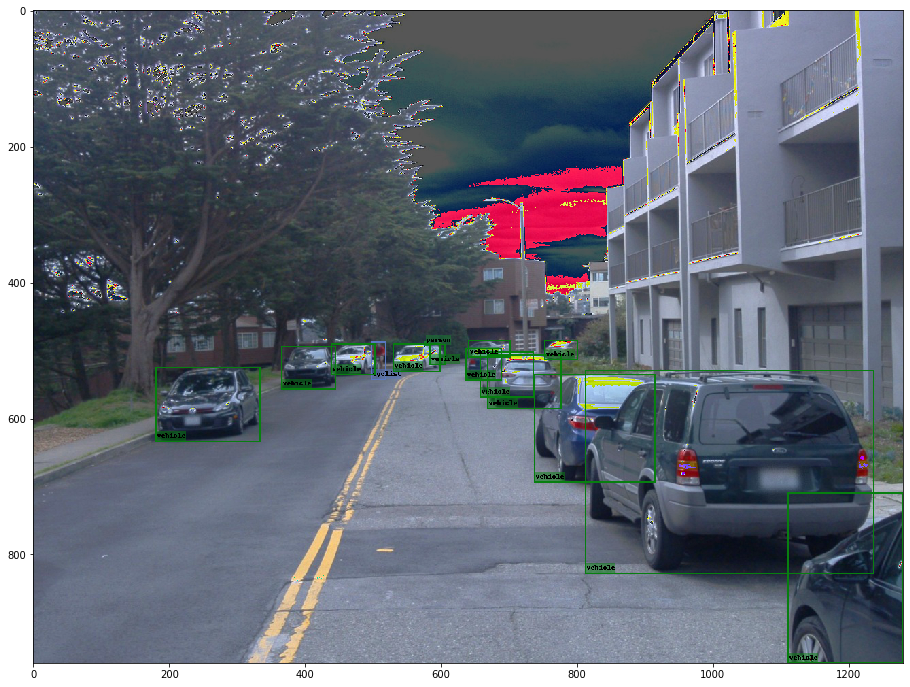

In [272]:
#Show the pic

image_show = draw_boxes(
    img.astype('uint8'), box, label, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image_show)

In [273]:
#t3 is Expand
img,box,label=t3(img,box,label) 

In [274]:
print('img',img)
print('box',box)
print('label',label)

img [[[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 ...

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]]
box [[ 640.61536  719.00854  647.28876  726.5876 ]
 [ 721.8879   735.114    800.5387   802.37836]
 [ 700.4376   730.14026  753.3482   777.9832 ]
 [ 561.01117  720.19275  583.8914   776.56213]
 [ 732.1363   739.85095  841.7708   819.43134]
 [1174.2493   942.3

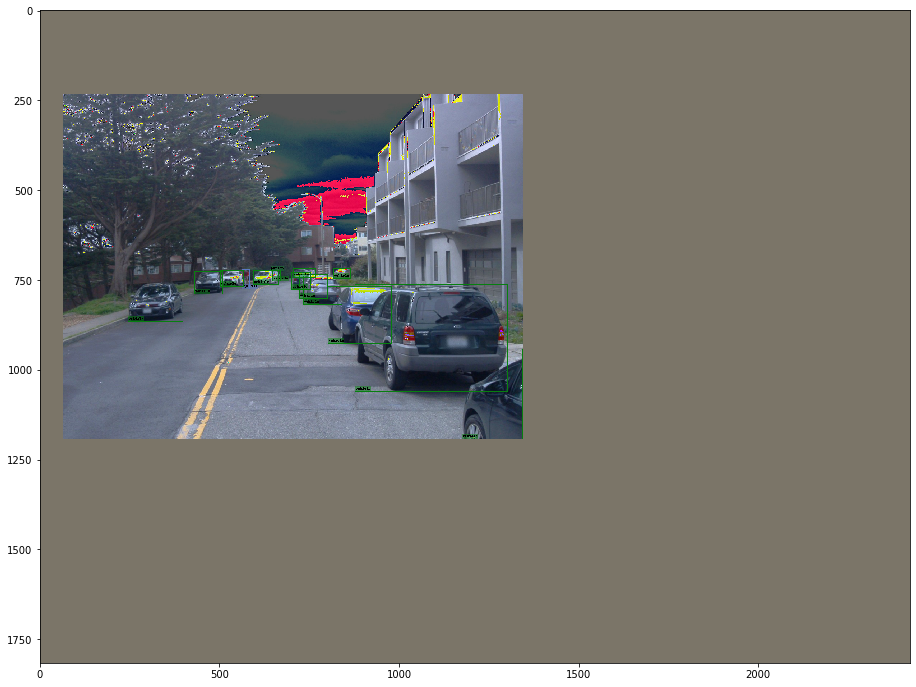

In [275]:
#Show the pic

image_show = draw_boxes(
    img.astype('uint8'), box, label, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image_show)

In [276]:
#t4=RandomSampleCrop()
img,box,label=t4(img,box,label)

In [277]:
print('img',img)
print('box',box)
print('label',label)

img [[[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 ...

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]]
box [[  76.88788    549.114      155.5387     616.37836  ]
 [  55.437622   544.14026    108.348206   591.9832   ]
 [  87.13629    553.85095    196.77081    633.43134  ]
 [ 529.24927    756.3545     699.        1007.       ]
 [ 156.01538    582.7462     334.7

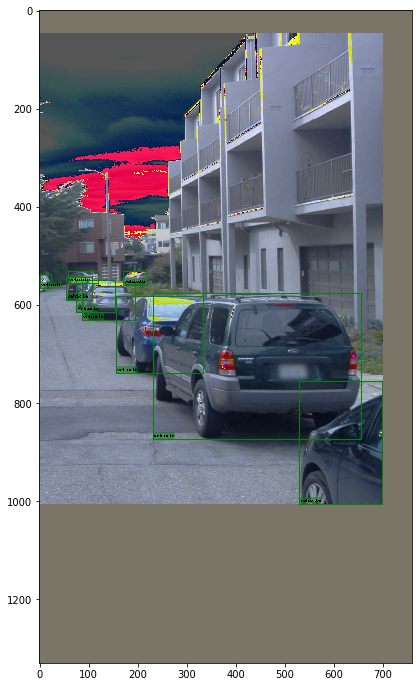

In [279]:
image_show = draw_boxes(
    img.astype('uint8'), box, label, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image_show)

In [280]:
#t5=RandomMirror()
img,box,label=t5(img,box,label)

In [281]:
print('img',img)
print('box',box)
print('label',label)

img [[[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 ...

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]

 [[123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]
  ...
  [123. 117. 104.]
  [123. 117. 104.]
  [123. 117. 104.]]]
box [[ 603.4613    549.114     682.1121    616.37836 ]
 [ 650.6518    544.14026   703.5624    591.9832  ]
 [ 562.2292    553.85095   671.8637    633.43134 ]
 [  60.        756.3545    229.75073  1007.      ]
 [ 424.23273   582.7462    602.9846    741.9069  ]

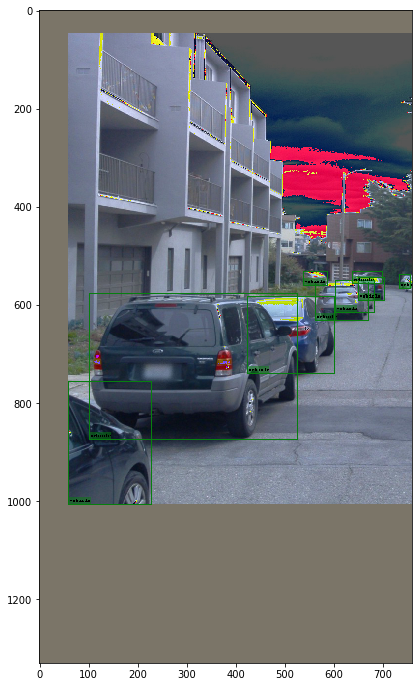

In [282]:
image_show = draw_boxes(
    img.astype('uint8'), box, label, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image_show)

In [283]:
#t6=ToPercentCoords(),
img,box,label=t6(img,box,label)

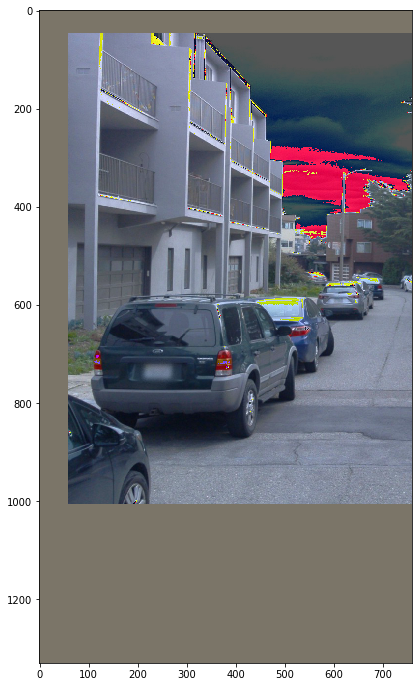

In [284]:
image_show = draw_boxes(
    img.astype('uint8'), box, label, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image_show)

In [285]:
#t7=Resize(cfg.INPUT.IMAGE_SIZE),
img,box,label=t7(img,box,label)

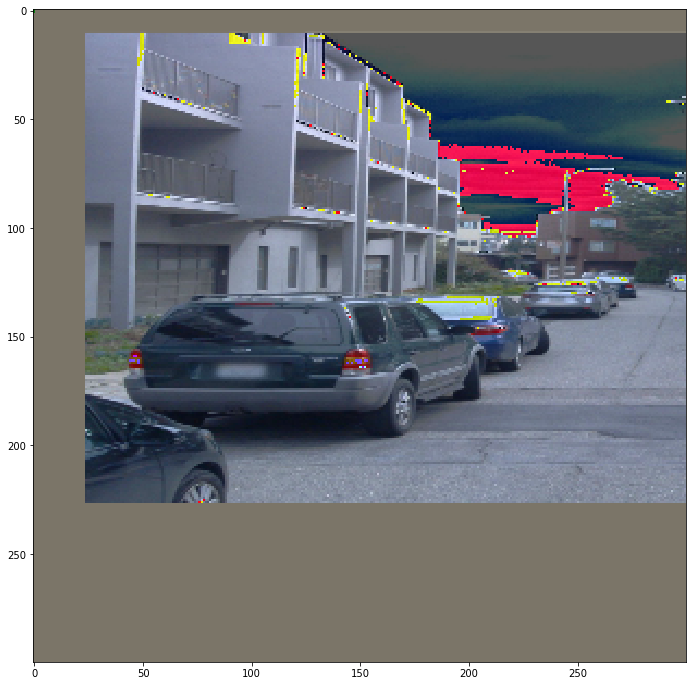

In [286]:
image_show = draw_boxes(
    img.astype('uint8'), box, label, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image_show)

In [287]:
#t8=SubtractMeans(cfg.INPUT.PIXEL_MEAN),
img,box,label=t8(img,box,label)

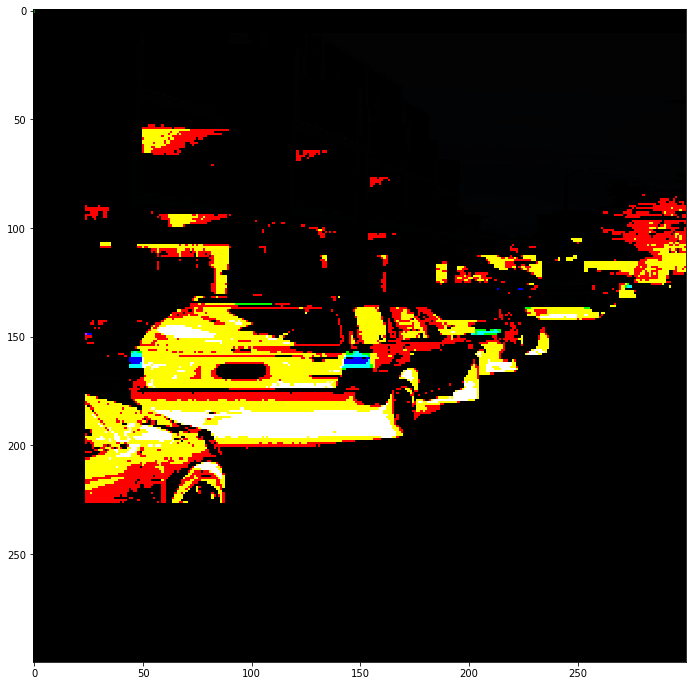

In [288]:
image_show = draw_boxes(
    img.astype('uint8'), box, label, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image_show)

In [289]:
#Try to show the box_location:
t_absolute_coor=ToAbsoluteCoords()

In [290]:
img,box,label=t_absolute_coor(img,box,label)

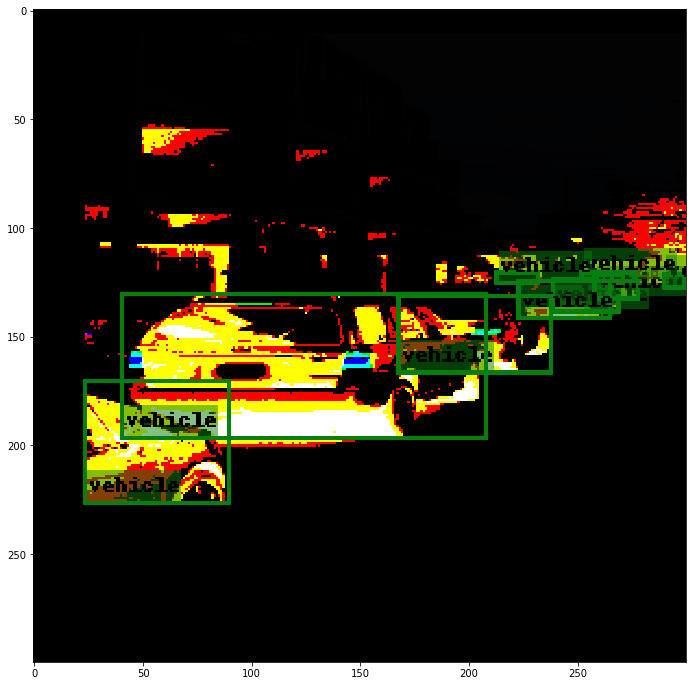

In [291]:
image_show = draw_boxes(
    img.astype('uint8'), box, label, class_name_map=dataset.class_names
)
plt.figure(figsize=(20, 12))
plt.imshow(image_show)